<a href="https://colab.research.google.com/github/gobi2001-2006/Data-exploration-and-visualization/blob/main/data_quality_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('book.csv')
df.head()


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
info_df = df.info()
print("information  about dataset:" , info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [ ]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
rating_map = {'Novice': 1, 'Intermediate': 2, 'Expert': 3}
df['Author_Rating_encoded'] = df['Author_Rating'].map(rating_map)


In [ ]:
missing_percentage= df.isnull().sum()*100/len(df)

In [ ]:

missing_classification = {
    "No Missing Values (0%)": missing_percentage[missing_percentage == 0].index.tolist(),
    "Low Missingness (1-5%)": missing_percentage[(missing_percentage > 0) & (missing_percentage <= 5)].index.tolist(),
    "Moderate Missingness (5-20%)": missing_percentage[(missing_percentage > 5) & (missing_percentage <= 20)].index.tolist(),
    "High Missingness (>20%)": missing_percentage[missing_percentage > 20].index.tolist()
}
for category, columns in missing_classification.items():
    print(f"{category}: {columns}")


No Missing Values (0%): ['index', 'Author', 'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre', 'gross sales', 'publisher revenue', 'sale price', 'sales rank', 'Publisher ', 'units sold']
Low Missingness (1-5%): ['Publishing Year', 'Book Name', 'language_code']
Moderate Missingness (5-20%): []
High Missingness (>20%): []


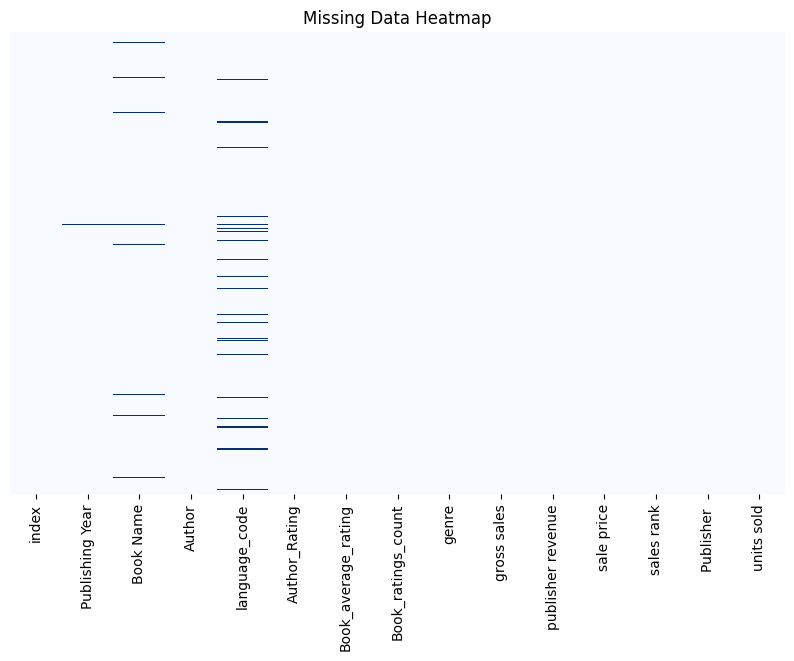

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

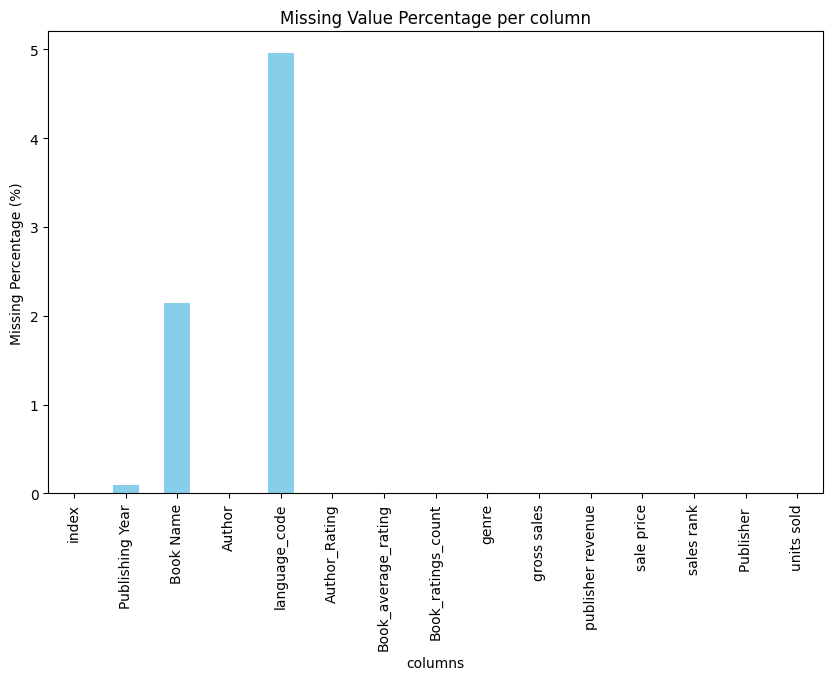

In [ ]:
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Missing Value Percentage per column')
plt.xlabel('columns')
plt.ylabel('Missing Percentage (%)')

plt.show()

In [ ]:

df['Book_average_rating'] = df['Book_average_rating'].fillna(df['Book_average_rating'].mean())
df['Publishing Year'] = df['Publishing Year'].fillna(df['Publishing Year'].mean())

df['language_code'] = df['language_code'].fillna(df['language_code'].mode()[0])


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
cardinality = df[categorical_columns].nunique()

low_cardinality = cardinality[cardinality < 10]
expected_cardinality = cardinality[(cardinality >= 10) & (cardinality <= 50)]  # Adjust threshold based on context
high_cardinality = cardinality[cardinality > 50]

In [ ]:
print("Low Cardinality Features:")
print(low_cardinality)

print("\nExpected Cardinality Features:")
print(expected_cardinality)

print("\nHigh Cardinality Features:")
print(high_cardinality)

Low Cardinality Features:
language_code    8
Author_Rating    4
genre            4
Publisher        9
dtype: int64

Expected Cardinality Features:
Series([], dtype: int64)

High Cardinality Features:
Book Name    1045
Author        735
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


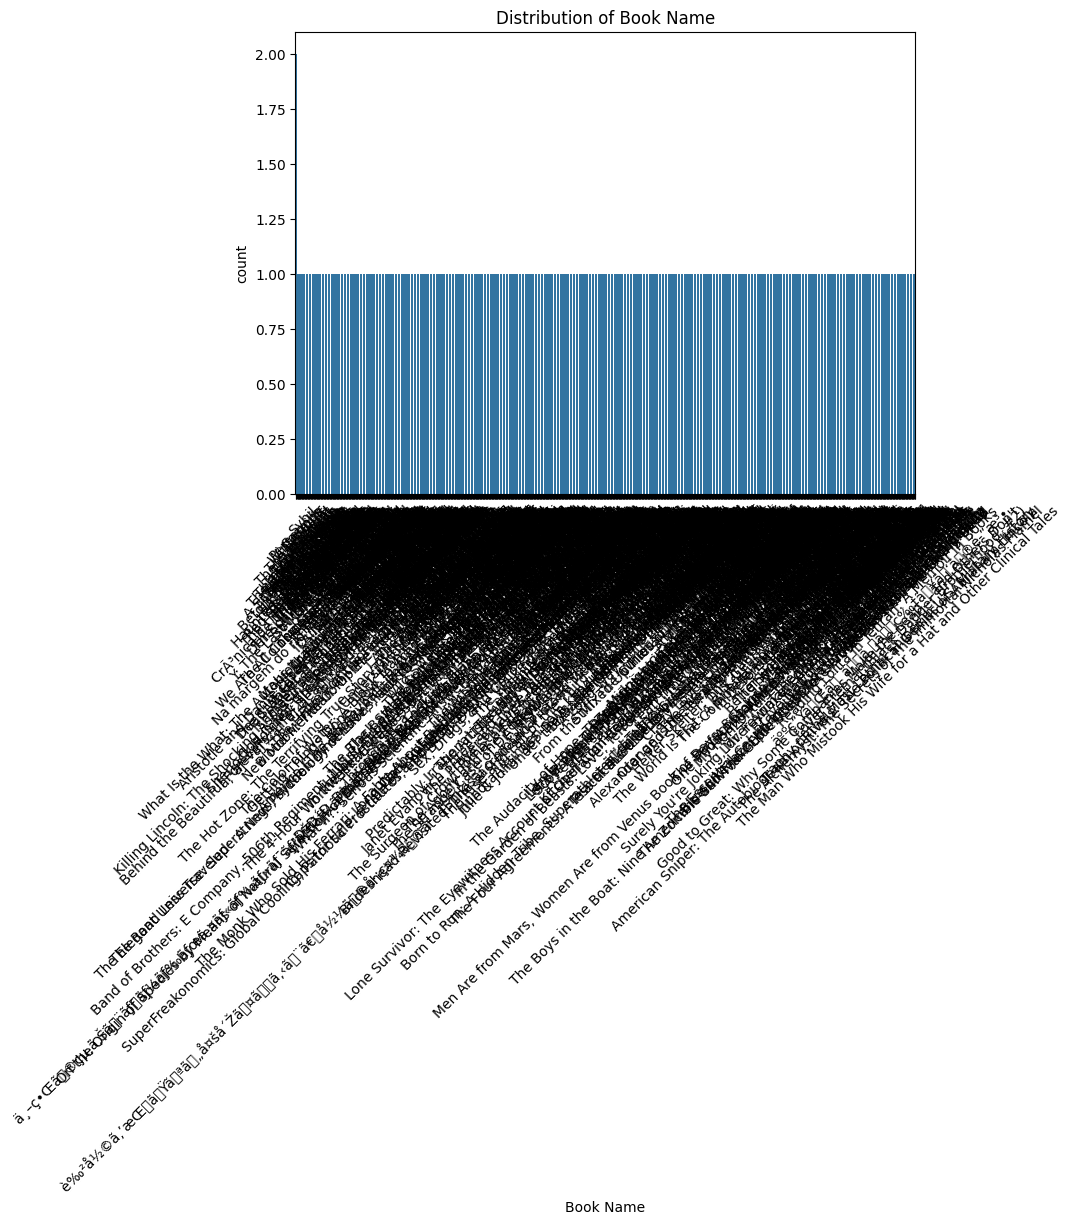

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


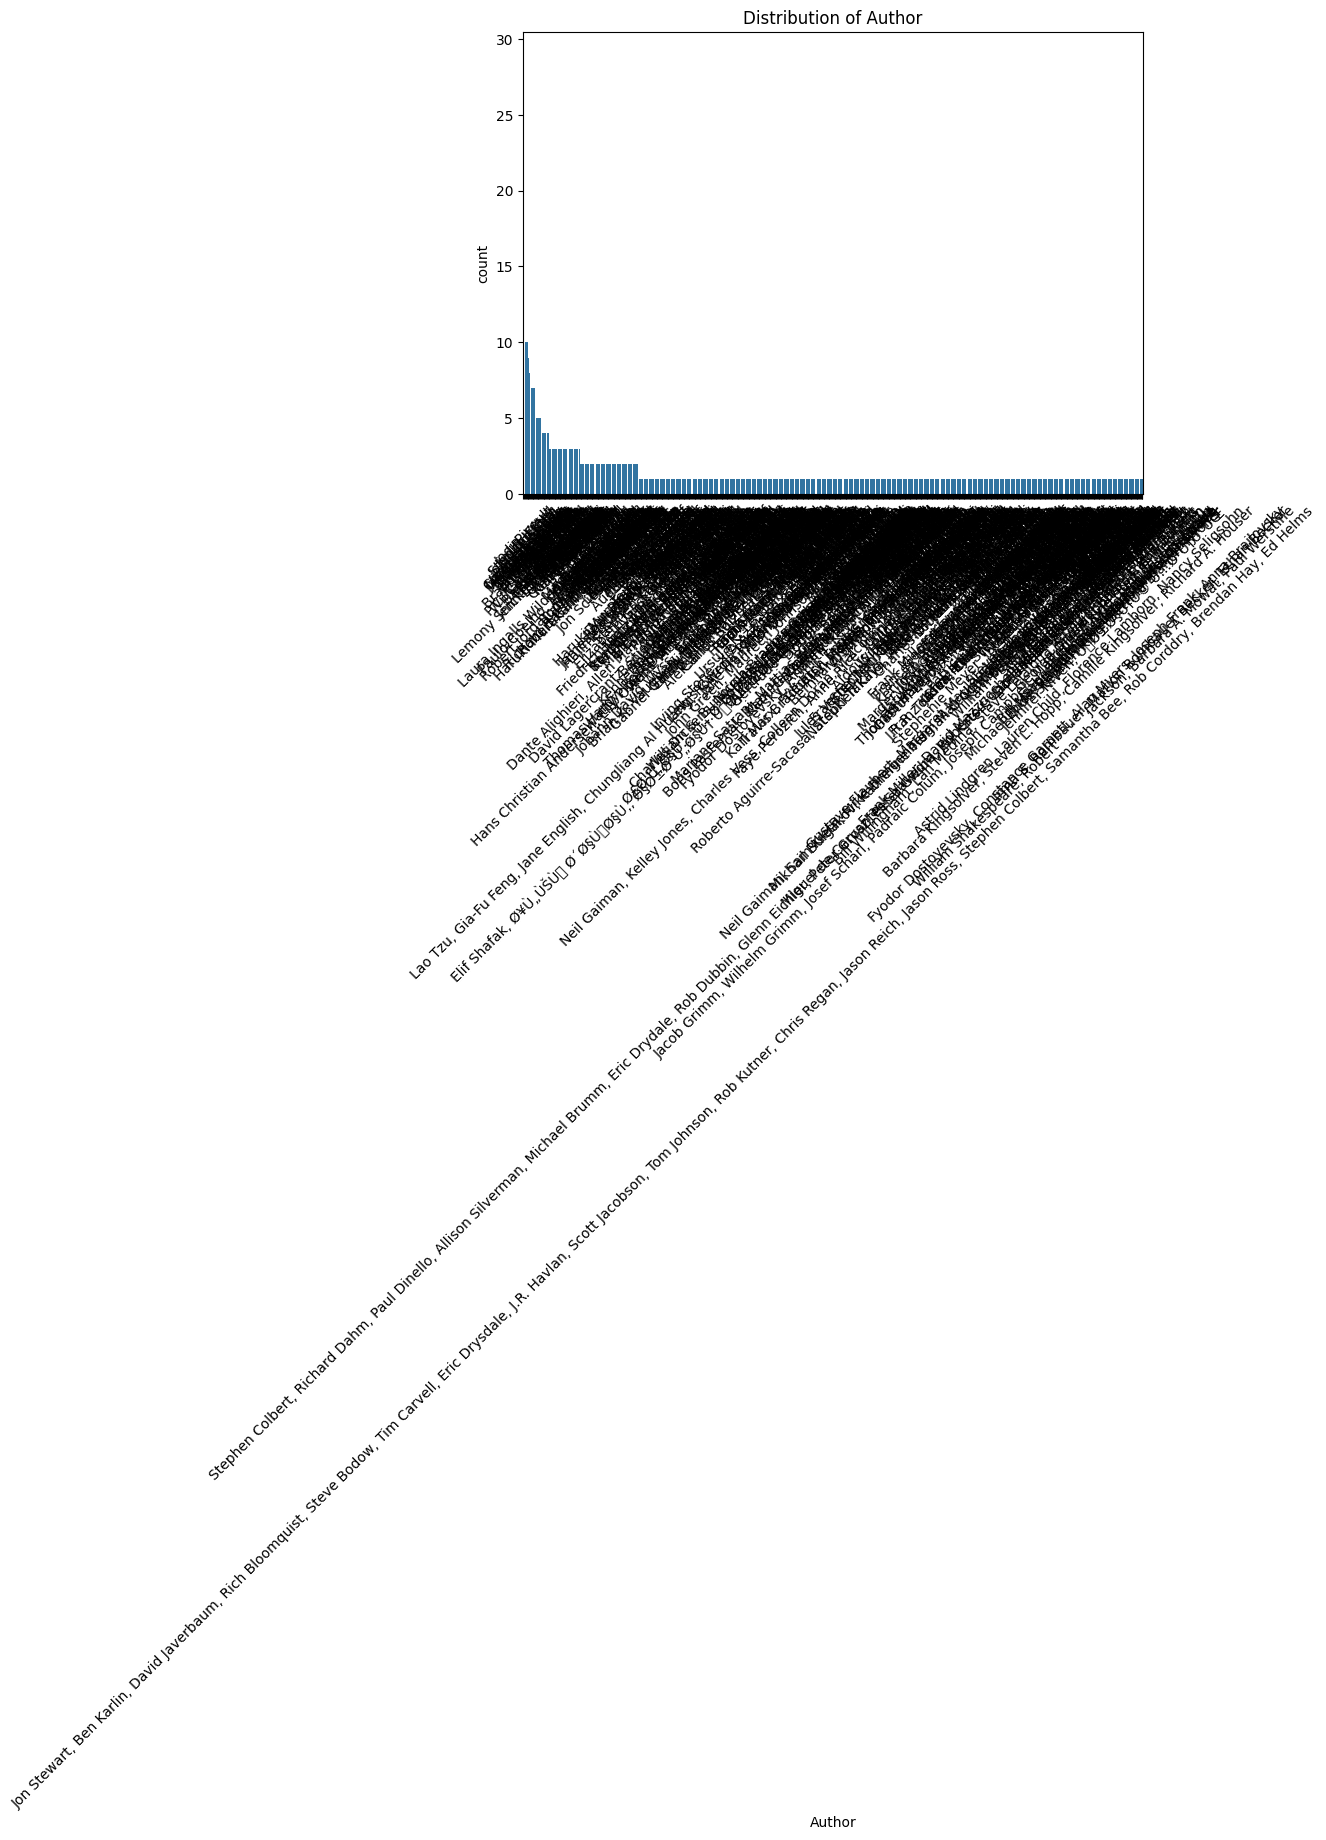

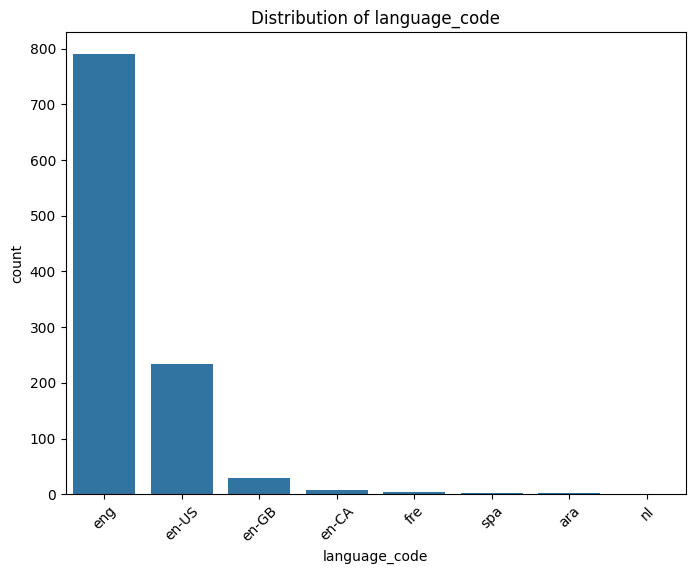

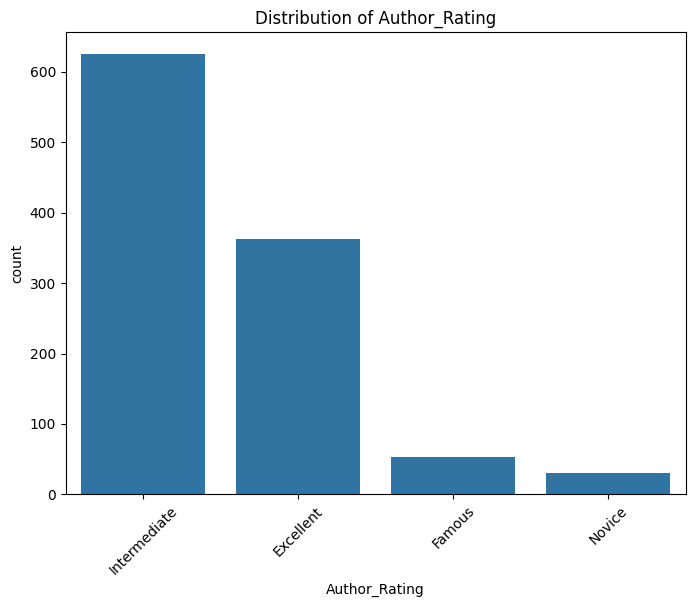

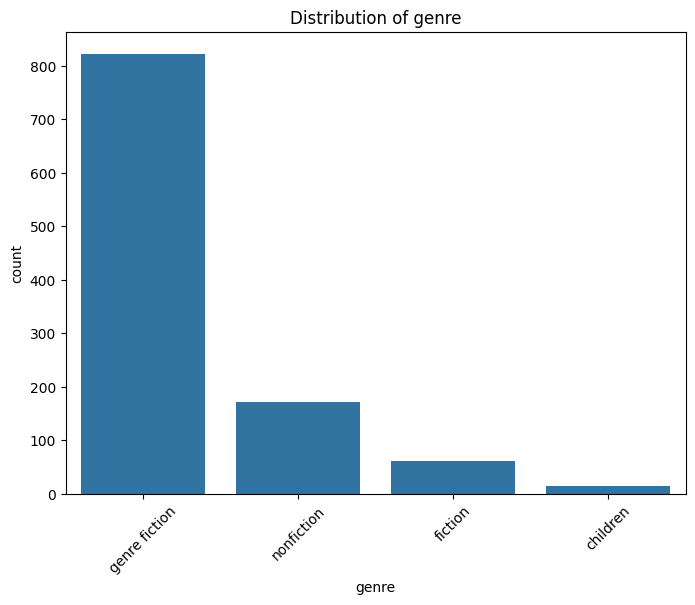

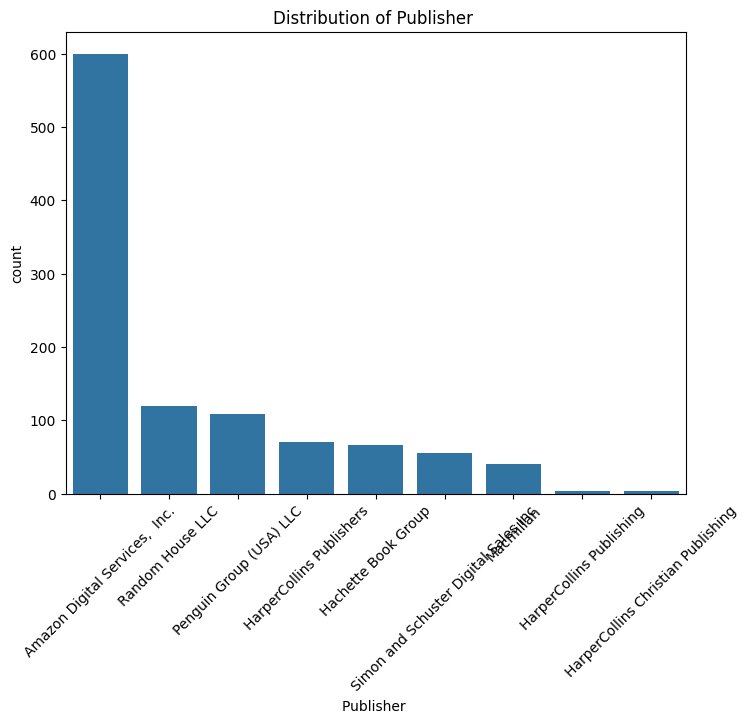

In [ ]:
# Replace with your dataset path

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Thresholds for flagging
missing_threshold = 0.05  # Flag columns with >5% missing values
high_cardinality_threshold = 50  # Flag columns with more than 50 unique values

# Visualize distributions with count plots and flag issues
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Check for missing values and flag if over threshold
    missing_values = df[col].isnull().sum()
    if missing_values > len(df) * missing_threshold:
        print(f"Warning: {col} has {missing_values} missing values, more than {missing_threshold * 100}%.")

    # Flag high cardinality (if the number of unique values is above threshold)
    unique_values = df[col].nunique()
    if unique_values > high_cardinality_threshold:
        print(f"Warning: {col} has high cardinality with {unique_values} unique values.")

    # Check for inconsistent or unusual encoding
    if df[col].dtype == 'object':
        # Check for leading/trailing spaces in values
        if any(df[col].str.contains(r'^\s|\s$', regex=True)):  # Check for spaces at start or end
            print(f"Warning: {col} contains values with leading/trailing spaces.")

        # Check for inconsistent capitalization (case mismatch)
        lower_values = df[col].str.lower()
        if lower_values.nunique() != df[col].nunique():
            print(f"Warning: {col} contains inconsistent capitalization.")

        # Check for numeric values where there shouldn't be any
        if any(df[col].str.isdigit()):
            print(f"Warning: {col} contains numeric values, which may indicate incorrect encoding.")



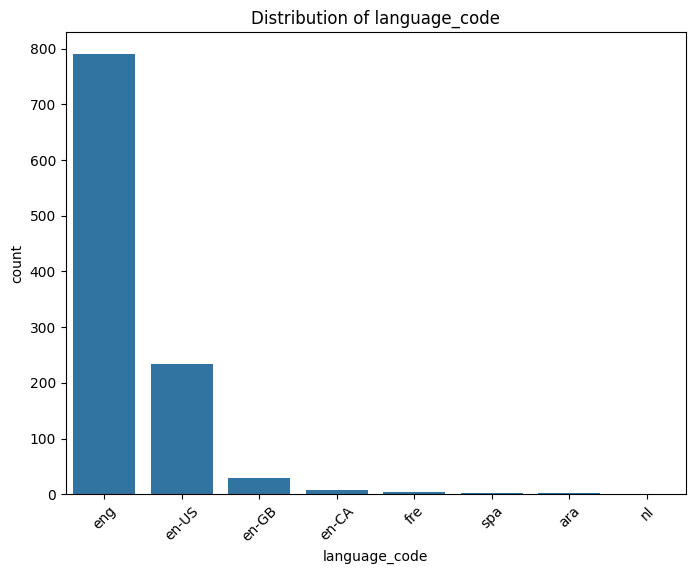

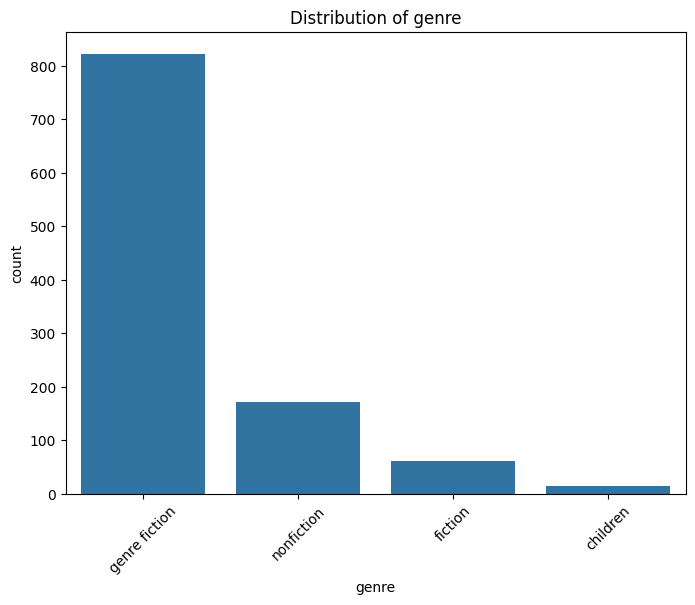

In [ ]:

columns_to_check = [ 'language_code', 'genre']
missing_threshold = 0.05
high_cardinality_threshold = 50
for col in columns_to_check:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

        missing_values = df[col].isnull().sum()
        if missing_values > len(df) * missing_threshold:
            print(f"Warning: {col} has {missing_values} missing values, more than {missing_threshold * 100}%.")

        unique_values = df[col].nunique()
        if unique_values > high_cardinality_threshold:
            print(f"Warning: {col} has high cardinality with {unique_values} unique values.")

        if df[col].dtype == 'object':

            if any(df[col].str.contains(r'^\s|\s$', regex=True)):  # Check for spaces at start or end
                print(f"Warning: {col} contains values with leading/trailing spaces.")


            lower_values = df[col].str.lower()
            if lower_values.nunique() != df[col].nunique():
                print(f"Warning: {col} contains inconsistent capitalization.")

            if any(df[col].str.isdigit()):
                print(f"Warning: {col} contains numeric values, which may indicate incorrect encoding.")


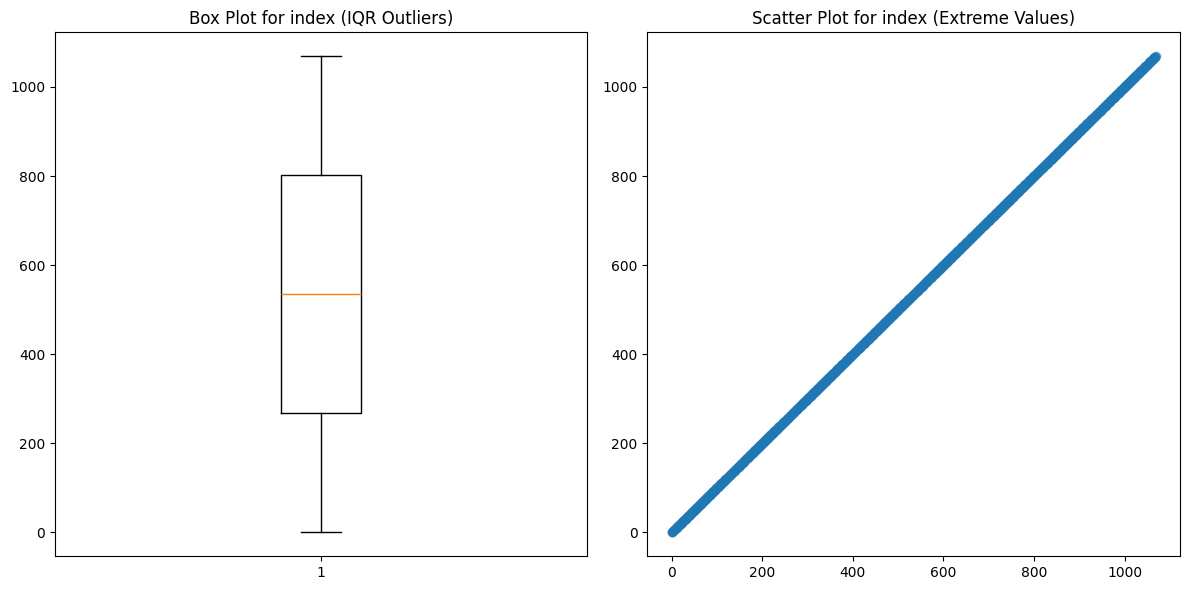

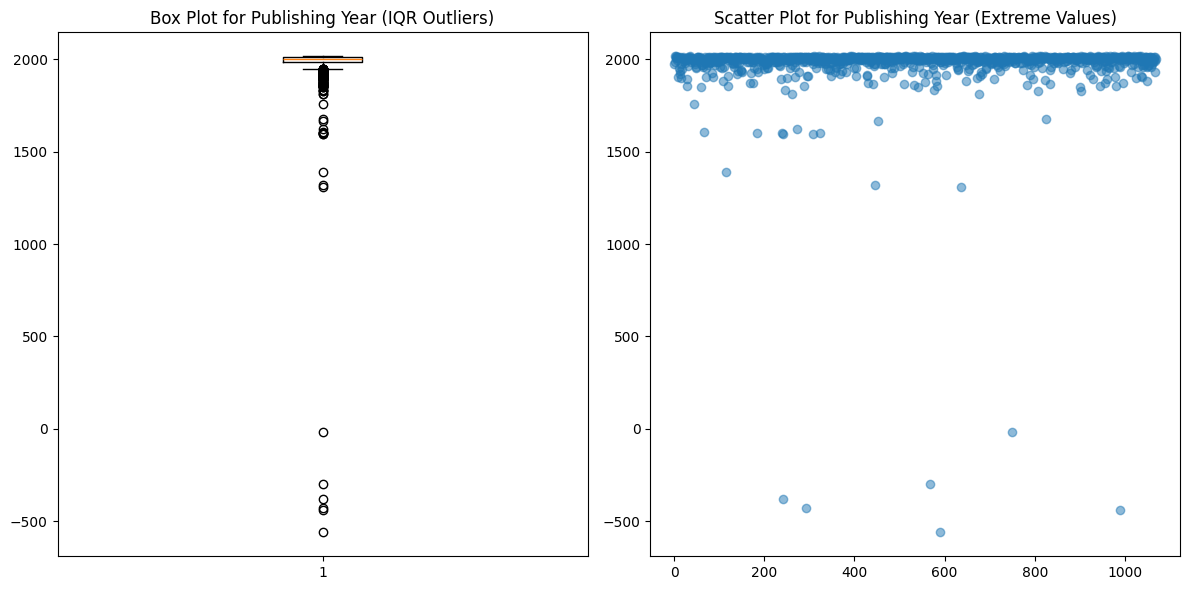

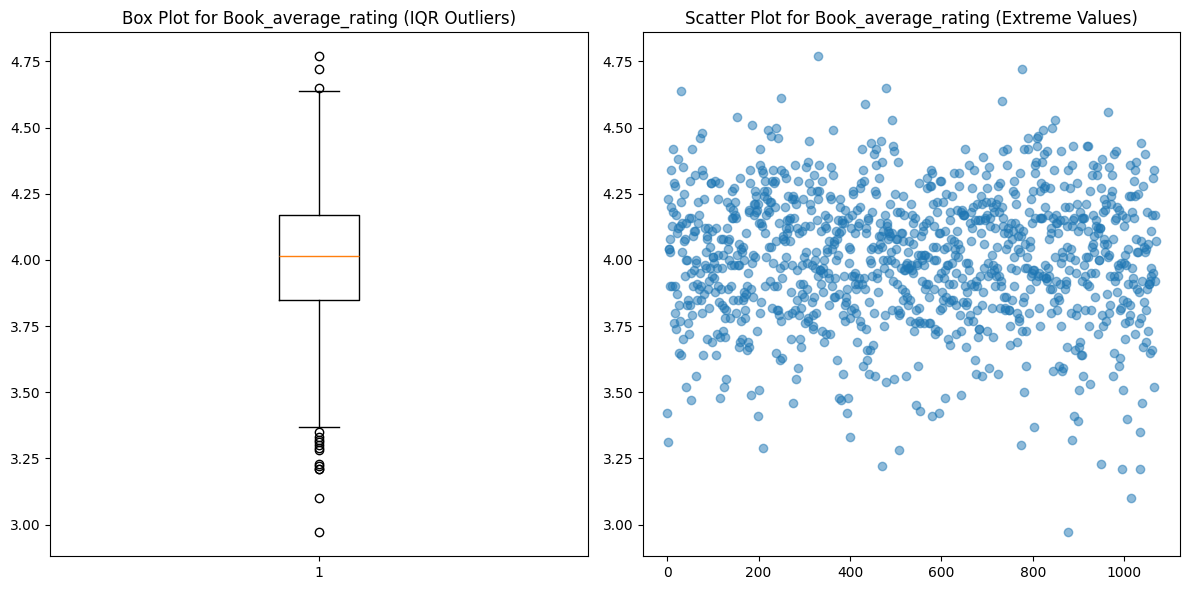

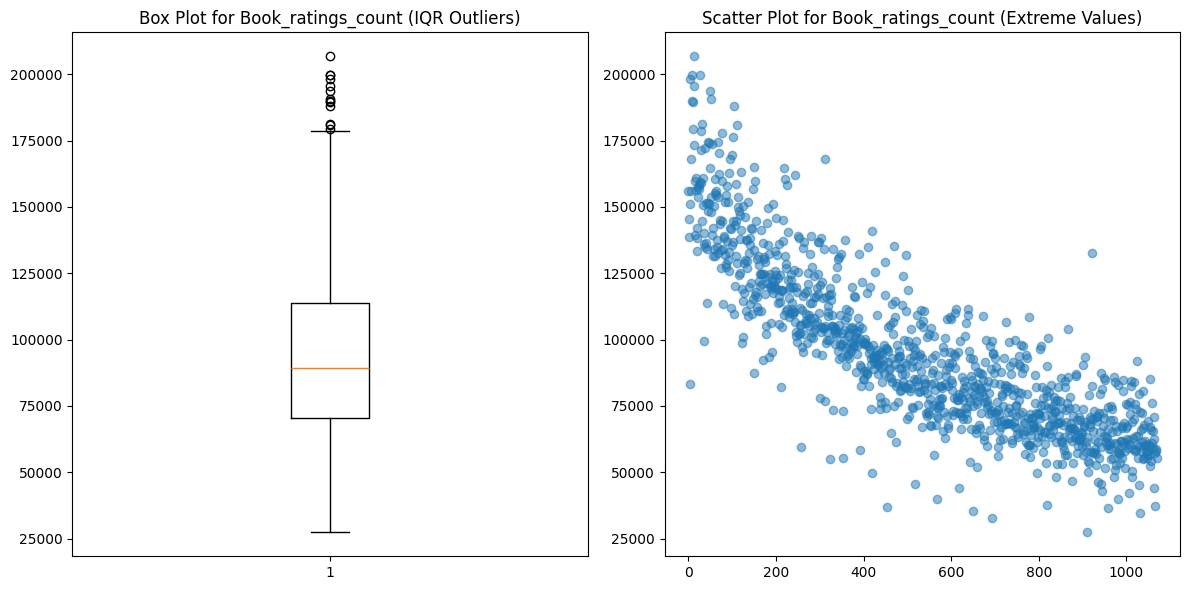

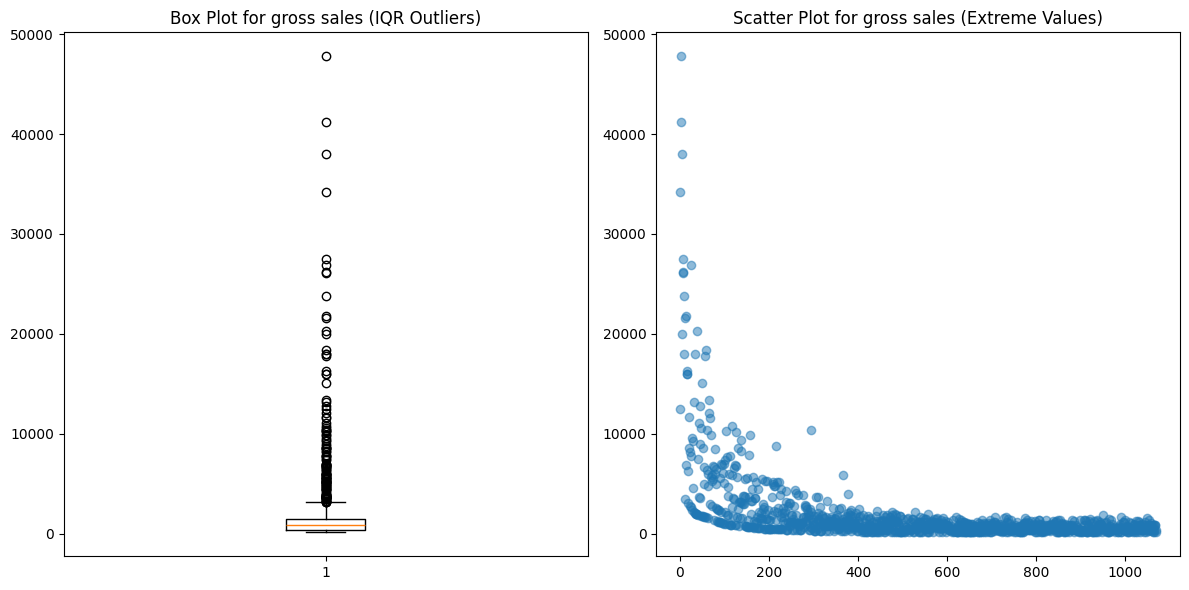

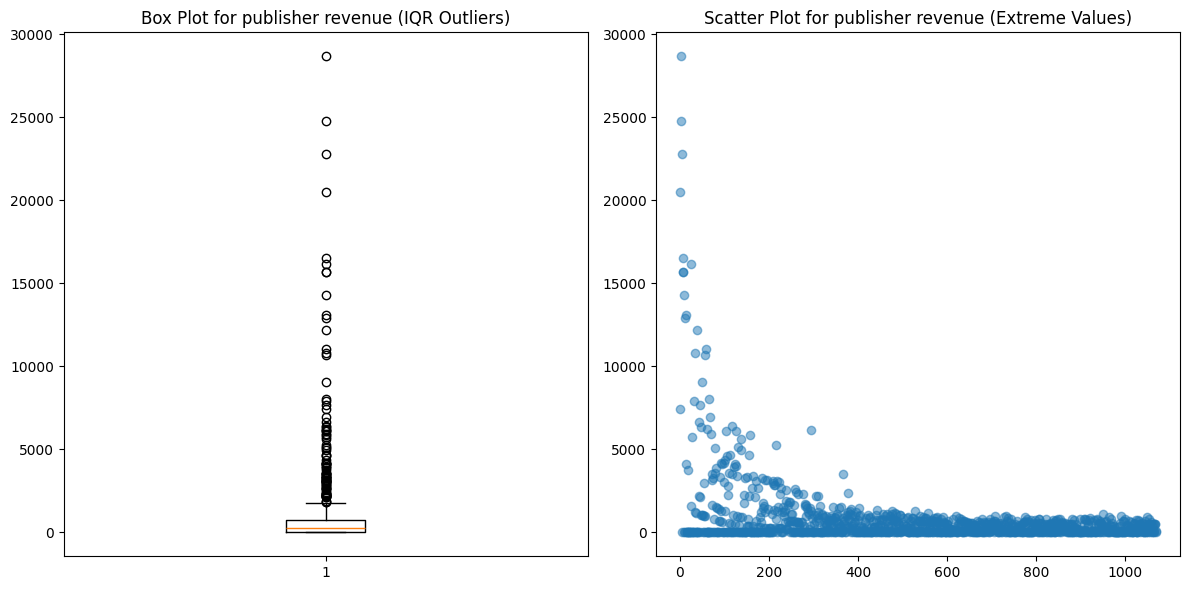

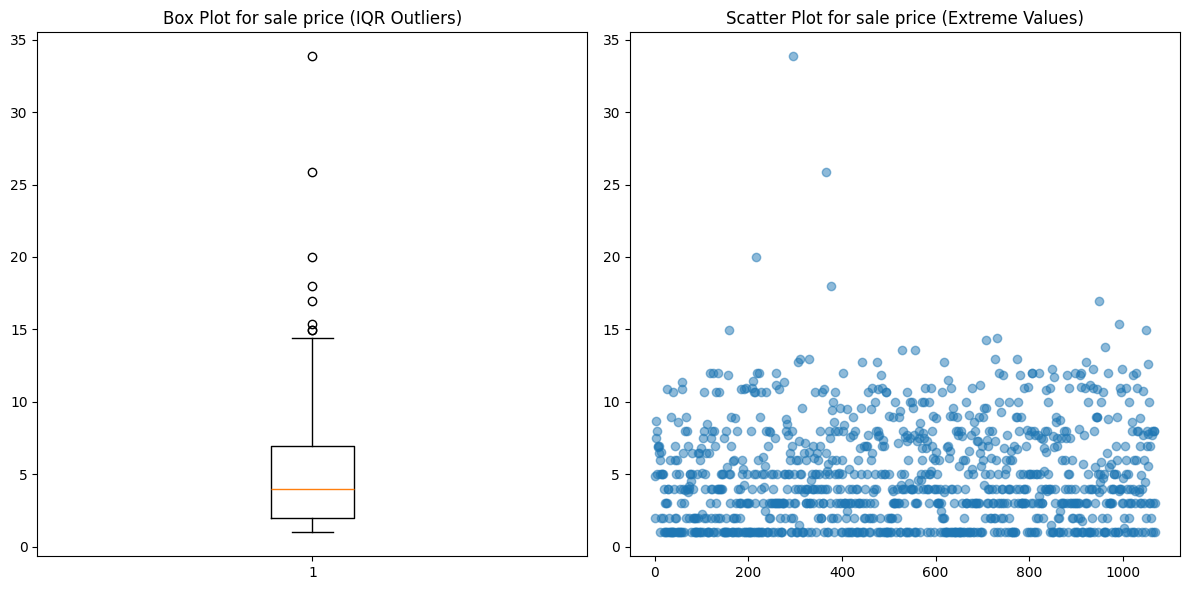

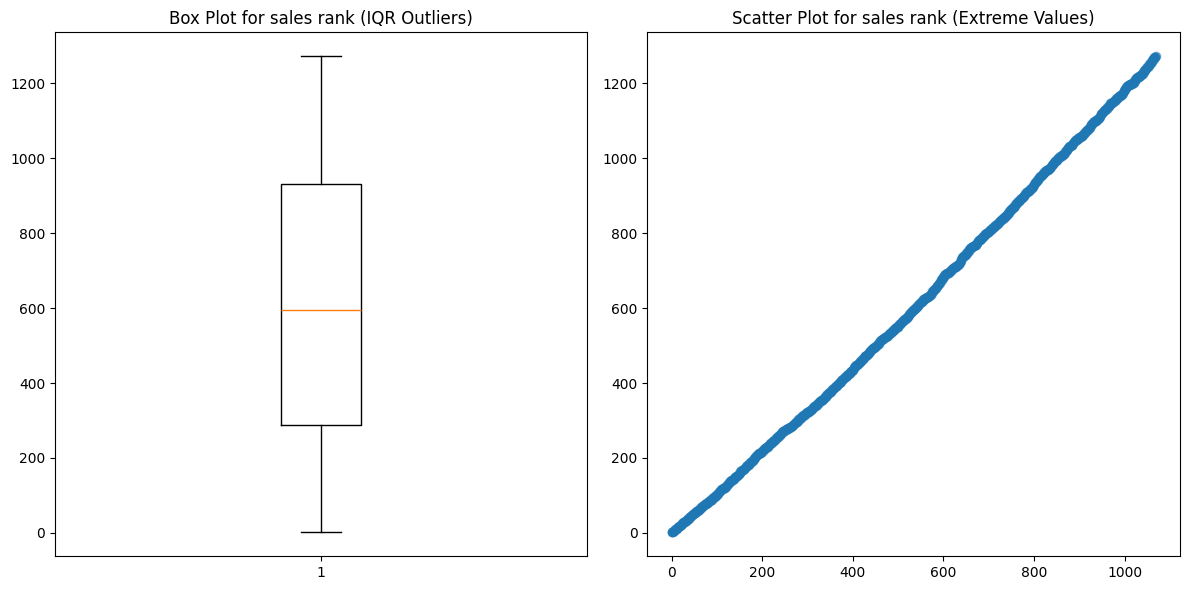

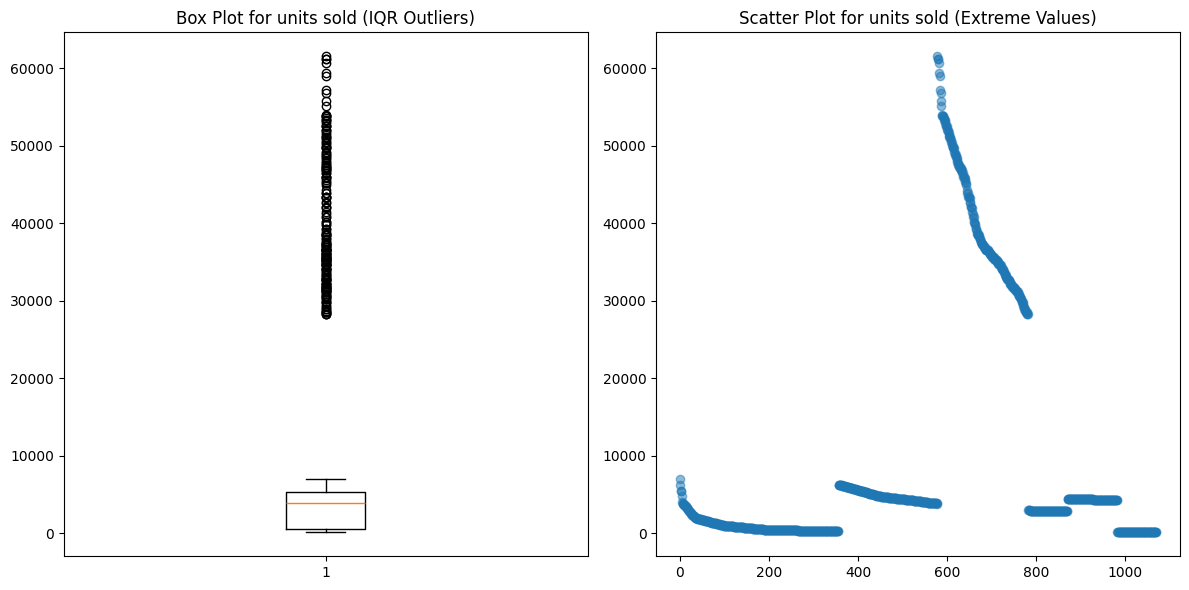

Outlier Summary:
                     IQR Outliers Count  Z-score Outliers Count
index                                 0                       0
Publishing Year                     122                       9
Book_average_rating                  16                       7
Book_ratings_count                   13                       9
gross sales                         129                      21
publisher revenue                    95                      19
sale price                            8                       5
sales rank                            0                       0
units sold                          204                       8


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column].dropna()))  # Drop NA for Z-score calculation
    outliers = df[column][z_scores > 3]
    return outliers

# Numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create report to store outlier information
outlier_report = {}

# Set up the plot grid (2 rows and 1 column for each feature)
for col in numerical_columns:
    # Detect outliers using IQR method
    iqr_outliers = detect_outliers_iqr(df, col)

    # Detect outliers using Z-score method
    zscore_outliers = detect_outliers_zscore(df, col)

    # Store outlier count for each method
    outlier_report[col] = {
        'IQR Outliers Count': len(iqr_outliers),
        'Z-score Outliers Count': len(zscore_outliers)
    }

    # Create subplots (2 plots for each feature: box plot and scatter plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Box plot for IQR method
    axes[0].boxplot(df[col].dropna())  # Drop NA for the plot
    axes[0].set_title(f"Box Plot for {col} (IQR Outliers)")

    # Scatter plot to visualize extreme values or outliers
    axes[1].scatter(range(len(df)), df[col], alpha=0.5)
    axes[1].set_title(f"Scatter Plot for {col} (Extreme Values)")

    plt.tight_layout()
    plt.show()

# Print outlier summary
outlier_summary = pd.DataFrame(outlier_report).T
print("Outlier Summary:")
print(outlier_summary)


In [ ]:

report = {}

# 1. Missing Value Statistics
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
report['Missing Values'] = missing_report[missing_report['Percentage'] > 0]  # Only show features with missing data

# 2. Irregular Cardinality Features
cardinality_report = df.nunique()
high_cardinality = cardinality_report[cardinality_report > 50]  # Features with high cardinality (>50 unique values)
low_cardinality = cardinality_report[cardinality_report < 10]  # Features with low cardinality (<10 unique values)
report['Irregular Cardinality'] = {
    'High Cardinality': high_cardinality,
    'Low Cardinality': low_cardinality
}

# 3. Outlier Summary (using IQR method for numerical features)
outlier_report = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_report[col] = len(outliers)

report['Outliers'] = pd.DataFrame(list(outlier_report.items()), columns=['Feature', 'Outliers'])

# 4. Data Cleaning Insights and Recommendations
recommendations = []
if len(report['Missing Values']) > 0:
    recommendations.append("Consider imputing missing values for features with significant missing data.")
else:
    recommendations.append("No major missing value issues identified.")

if len(high_cardinality) > 0:
    recommendations.append(f"Consider handling high cardinality features: {', '.join(high_cardinality.index)}.")
if len(low_cardinality) > 0:
    recommendations.append(f"Consider simplifying or consolidating low cardinality features: {', '.join(low_cardinality.index)}.")

if sum(outlier_report.values()) > 0:
    recommendations.append("Consider handling outliers detected using IQR method, especially in features: " +
                           ", ".join([f"{key}: {value}" for key, value in outlier_report.items() if value > 0]))

# Print the structured summary report
print("Structured Summary Report:")
print("\nMissing Value Statistics:")
print(report['Missing Values'])

print("\nIrregular Cardinality Features:")
print("High Cardinality:")
print(report['Irregular Cardinality']['High Cardinality'])
print("Low Cardinality:")
print(report['Irregular Cardinality']['Low Cardinality'])

print("\nOutlier Summary:")
print(report['Outliers'])

print("\nData Cleaning Recommendations:")
for rec in recommendations:
    print(f"- {rec}")


Structured Summary Report:

Missing Value Statistics:
           Missing Values  Percentage
Book Name              23    2.149533

Irregular Cardinality Features:
High Cardinality:
index                  1070
Publishing Year         151
Book Name              1045
Author                  735
Book_average_rating     134
Book_ratings_count     1064
gross sales             831
publisher revenue       610
sale price              149
sales rank              865
units sold              491
dtype: int64
Low Cardinality:
language_code    8
Author_Rating    4
genre            4
Publisher        9
dtype: int64

Outlier Summary:
               Feature  Outliers
0                index         0
1      Publishing Year       122
2  Book_average_rating        16
3   Book_ratings_count        13
4          gross sales       129
5    publisher revenue        95
6           sale price         8
7           sales rank         0
8           units sold       204

Data Cleaning Recommendations:
- Consider i